In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def add_watermark(ax, text):
    ax.text(0.5, 0.5, text, alpha=0.3, fontsize=50, color='gray',
            rotation=0, ha='center', va='center', transform=ax.transAxes)

In [3]:

def prepare_data(filename):
    # Read data from file
    columns = ['Height', 'Length', 'Area', 'Eccen', 'P_Black', 'P_And', 'Mean_TR', 'Blackpix', 'Blackand', 'Wb_Trans', 'Class']
    data = pd.read_csv(filename, names=columns)
    
    # Encode categorical variable 'Sex'
    label_encoder = LabelEncoder()
    data['Class'] = label_encoder.fit_transform(data['Class'])
    
    # Split data into features and target
    X = data.drop("Class", axis=1)
    y = data['Class']
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    return X_train, X_test, y_train, y_test

In [4]:

def evaluate_performance(classifier, y_true, y_pred):
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Classification report
    cr_dict = classification_report(y_true, y_pred, zero_division=0, output_dict=True)
    cr_df = pd.DataFrame(cr_dict).transpose()
    
    # Print results
    print(classifier + ":")
    print("Confusion Matrix:\n", cm)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    
    return cm, cr_df

In [5]:
def plot_confusion_matrix(cm, classifier):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title('Confusion Matrix for ' + classifier)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    add_watermark(plt.gca(), '2021SE56')
    plt.show()

In [6]:

def apply_knn(filename):
    # Prepare data
    X_train, X_test, y_train, y_test = prepare_data(filename)
    
    # Apply KNN
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    # Evaluate
    cm, cr = evaluate_performance("K-Nearest Neighbors (KNN) Classifier", y_test, y_pred)
    
    # Plot confusion matrix
    plot_confusion_matrix(cm, "K-Nearest Neighbors (KNN) Classifier")
    
    # Display classification report
    print("Classification Report:")
    print(cr)

In [7]:
def apply_naive_bayes(filename):
    # Prepare data
    X_train, X_test, y_train, y_test = prepare_data(filename)
    
    # Apply Naive Bayes
    nb = GaussianNB()
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)
    
    # Evaluate
    cm, cr = evaluate_performance("Naive Bayes Classifier", y_test, y_pred)
    
    # Plot confusion matrix
    plot_confusion_matrix(cm, "Naive Bayes Classifier")
    
    # Display classification report
    print("Classification Report:")
    print(cr)

K-Nearest Neighbors (KNN) Classifier:
Confusion Matrix:
 [[965   9   0   1   4]
 [ 10  62   0   1   1]
 [  0   0   5   0   1]
 [  3   0   0  15   1]
 [ 11   0   0   0   6]]
Accuracy: 0.9616438356164384
Precision: 0.9593362989966747
Recall: 0.9616438356164384
F1-score: 0.96024400193974


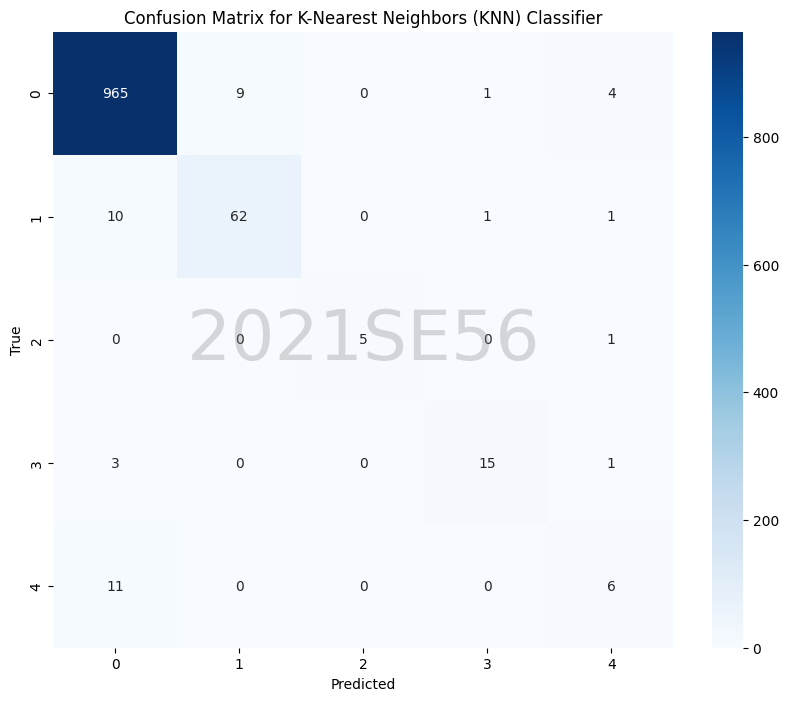

Classification Report:
              precision    recall  f1-score      support
0              0.975733  0.985700  0.980691   979.000000
1              0.873239  0.837838  0.855172    74.000000
2              1.000000  0.833333  0.909091     6.000000
3              0.882353  0.789474  0.833333    19.000000
4              0.461538  0.352941  0.400000    17.000000
accuracy       0.961644  0.961644  0.961644     0.961644
macro avg      0.838573  0.759857  0.795658  1095.000000
weighted avg   0.959336  0.961644  0.960244  1095.000000


In [8]:
# Call functions with your data file
apply_knn("dataset/page-blocks.data.csv")

Naive Bayes Classifier:
Confusion Matrix:
 [[918   6   4  33  18]
 [ 23  48   0   3   0]
 [  2   0   4   0   0]
 [  0   0   0  19   0]
 [  8   0   3   0   6]]
Accuracy: 0.908675799086758
Precision: 0.934978651589429
Recall: 0.908675799086758
F1-score: 0.9172365576617763


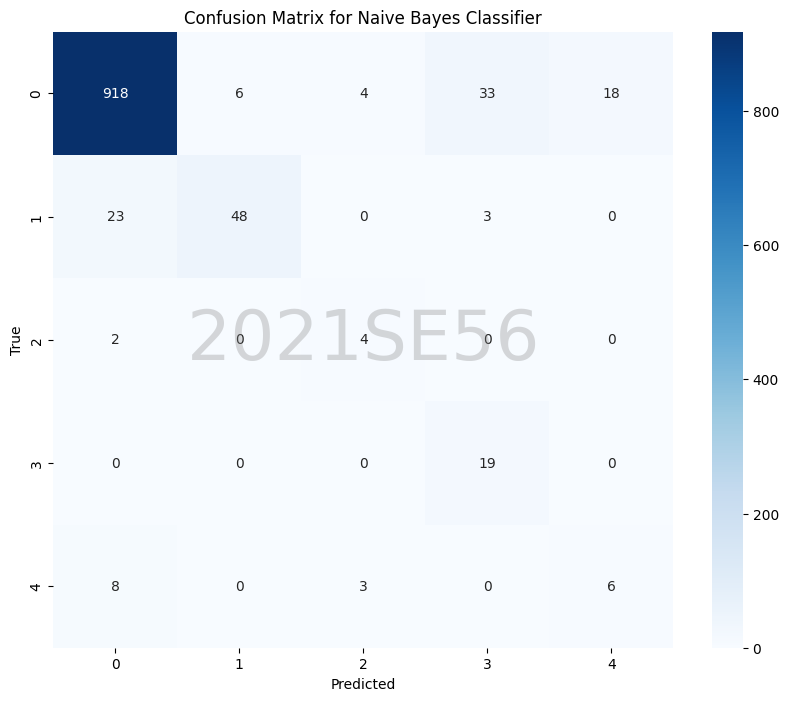

Classification Report:
              precision    recall  f1-score      support
0              0.965300  0.937692  0.951295   979.000000
1              0.888889  0.648649  0.750000    74.000000
2              0.363636  0.666667  0.470588     6.000000
3              0.345455  1.000000  0.513514    19.000000
4              0.250000  0.352941  0.292683    17.000000
accuracy       0.908676  0.908676  0.908676     0.908676
macro avg      0.562656  0.721190  0.595616  1095.000000
weighted avg   0.934979  0.908676  0.917237  1095.000000


In [9]:
apply_naive_bayes("dataset/page-blocks.data.csv")